In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import glob


jtplot.style('grade3',figsize=(20, 10), fscale=2)

In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [23]:
pwd

'/Users/67981492/Desktop/loki_1/analysis/analysis_nbs'

In [20]:
# todo specify range of sessions or dates.

In [34]:
rl_sub_data_files = glob.glob('/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-*/beh/sub-0860_ses*_task-lokicat_run0*.tsv')

In [35]:
print(rl_sub_data_files)

['/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-10/beh/sub-0860_ses10_task-lokicat_run04_11192020_182951.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-10/beh/sub-0860_ses10_task-lokicat_run05_11192020_185050.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-10/beh/sub-0860_ses10_task-lokicat_run03_11192020_181758.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-10/beh/sub-0860_ses10_task-lokicat_run01_11192020_175636.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-10/beh/sub-0860_ses10_task-lokicat_run02_11192020_180656.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-02/beh/sub-0860_ses02_task-lokicat_run01_10202020_182758.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-02/beh/sub-0860_ses02_task-lokicat_run03_10202020_184937.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-02/beh/sub-0860_ses02_task-lokicat_run02_10202020_183916.tsv', '/Users/67981492/Desktop/loki_1/data/BIDS/sub-0860/ses-

In [36]:
df_list = []

for fn in rl_sub_data_files:
    df = pd.read_csv(fn, index_col=None, sep=r'\,|\t',engine='python').rename(columns=lambda x: x.strip())
    if 'ses10' in fn: 
        df['session'] = 10
    else:
        df['session'] = fn[-40:-39]
    df_list.append(df)

dfs = pd.concat(df_list, axis=0, ignore_index=True, sort=False)
dfs_sorted = dfs.sort_values(by=['subj_id', 'session', 'run']).reset_index(drop=True)

In [64]:
dfs_sorted.session = dfs_sorted.session.astype('int')

In [38]:
dfs_sorted.head()

,trial,subj_id,reward_code,condition,run,LR_choice,value_accuracy,value_LR_solution,reward,cumulative_reward,...,p_id_solution,id_choice,stim_duration,stim_onset,stim_offset,abs_response_time,epoch_length,epoch_trial,epoch_number,session
0,0.0,860.0,7.0,8520.0,1.0,82.0,1.0,82.0,2.0,32.0,...,102.0,102.0,1.491839,0.015966,1.507805,0.417899,15.0,0.0,0.0,10
1,1.0,860.0,7.0,8520.0,1.0,82.0,1.0,82.0,1.0,33.0,...,102.0,102.0,1.499814,10.313902,11.813716,10.845855,15.0,1.0,0.0,10
2,2.0,860.0,7.0,8520.0,1.0,76.0,1.0,76.0,2.0,35.0,...,102.0,102.0,1.491850,18.462881,19.954731,18.919304,15.0,2.0,0.0,10
3,3.0,860.0,7.0,8520.0,1.0,82.0,1.0,82.0,0.0,35.0,...,102.0,102.0,1.491009,24.795492,26.286501,25.371212,15.0,3.0,0.0,10
4,4.0,860.0,7.0,8520.0,1.0,76.0,1.0,76.0,3.0,38.0,...,102.0,102.0,1.490783,31.028107,32.518890,31.538101,15.0,4.0,0.0,10


In [39]:
assert len(dfs_sorted.subj_id.unique()) == 1, 'multiple subs in df'

/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


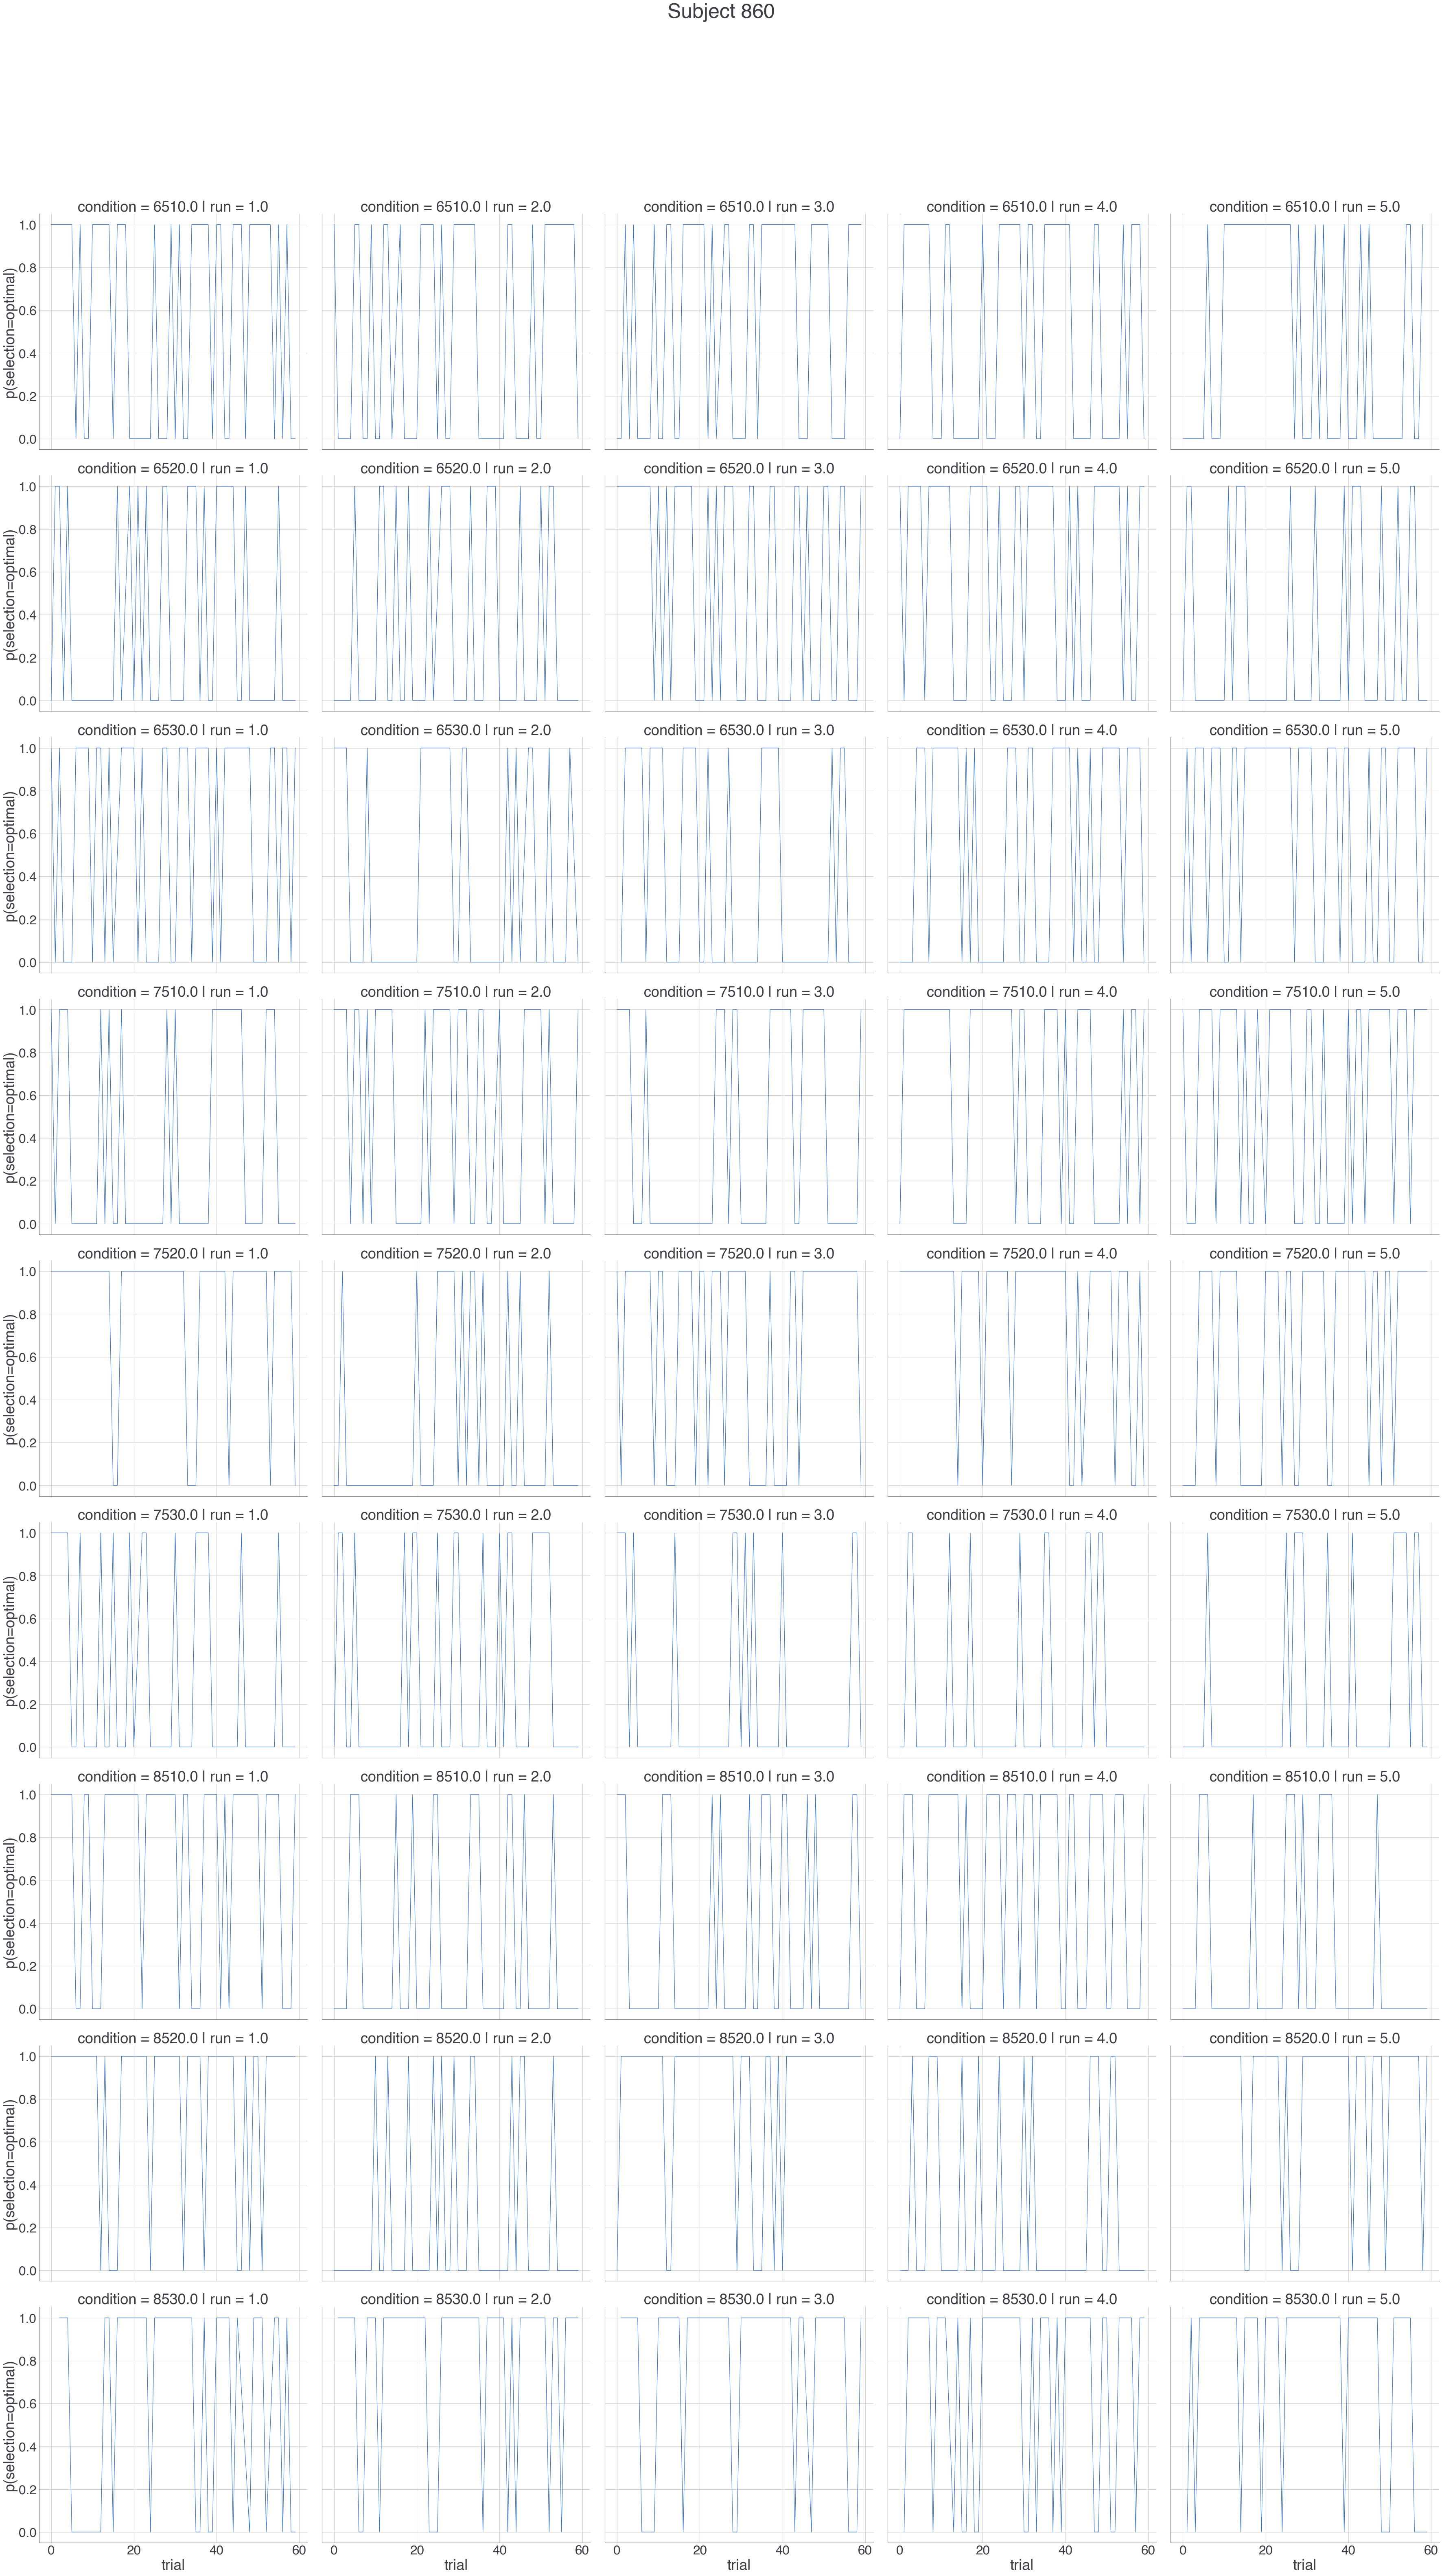

In [40]:
jtplot.style(fscale=3)
g = sns.FacetGrid(dfs_sorted, col="run",  row="condition", size=10)
g.map(plt.plot, "trial", "p_accuracy")

g.fig.suptitle("Subject " + str(int(dfs_sorted.subj_id.unique()[0])), size=50)
g.fig.subplots_adjust(top=.9)

g.set_axis_labels('trial', 'p(selection=optimal)') 

/Users/67981492/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


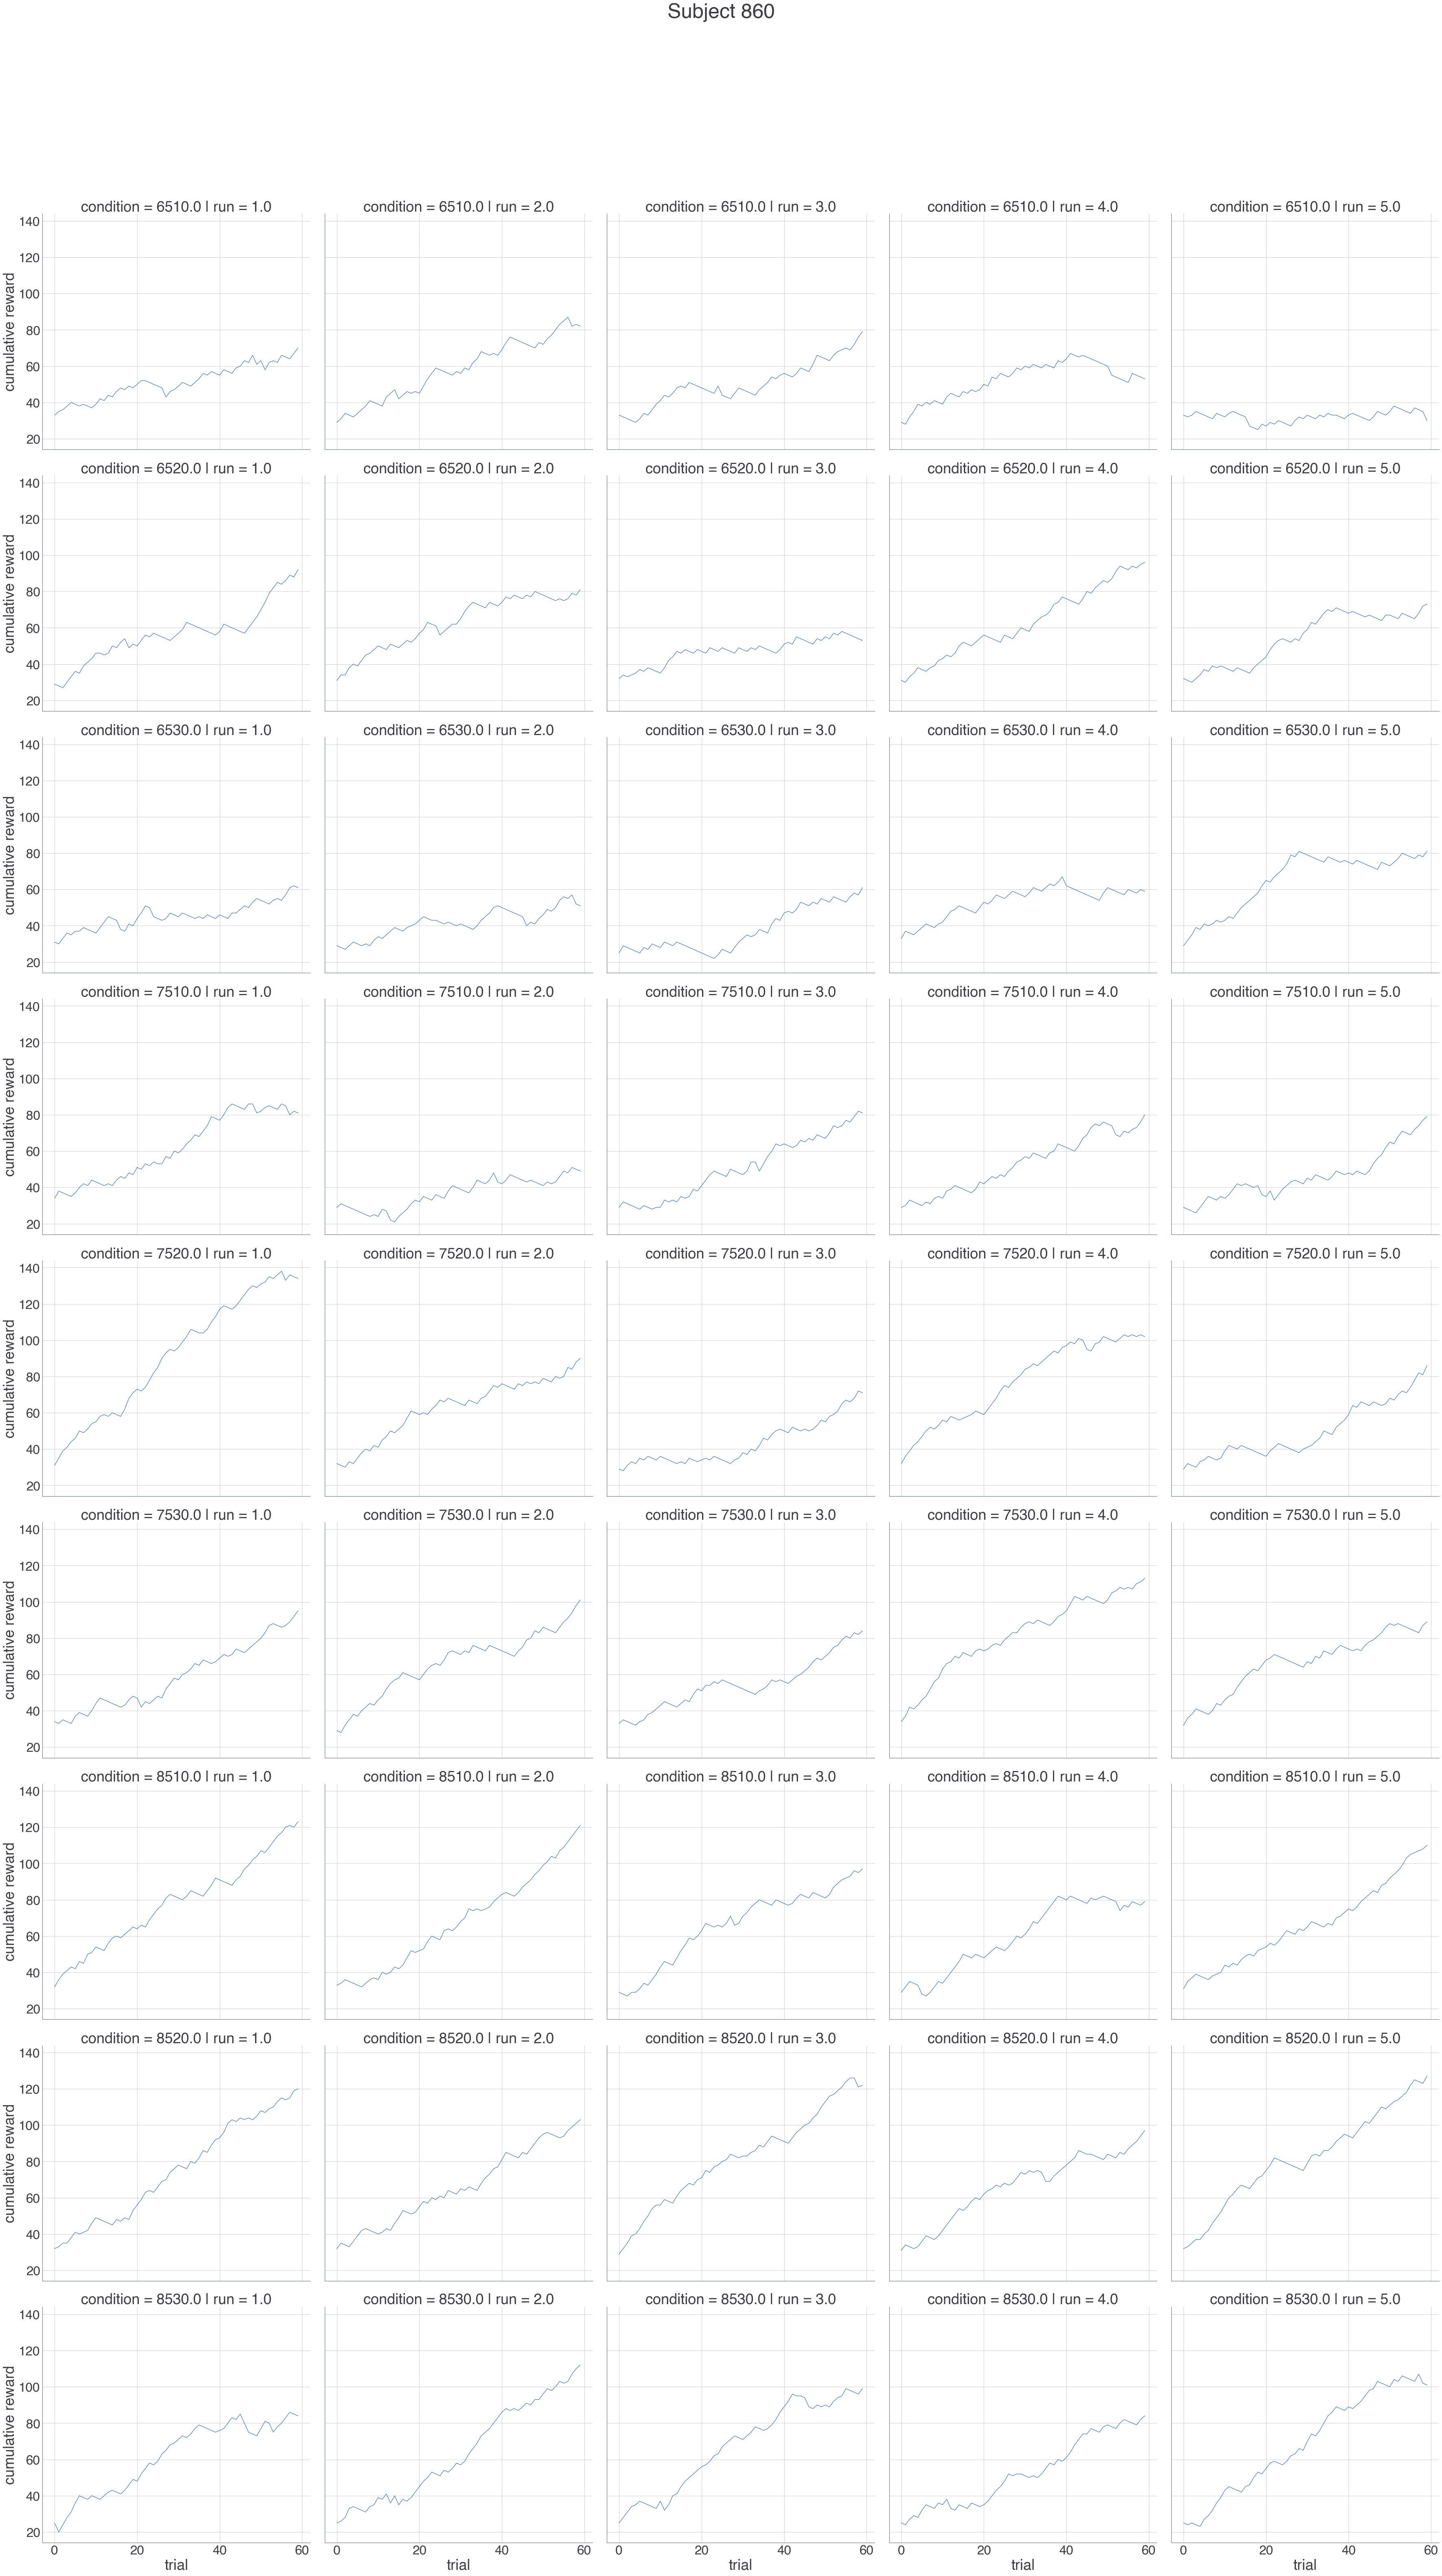

In [42]:
jtplot.style(fscale=3)

g = sns.FacetGrid(dfs_sorted, col="run",  row="condition", size=10)
g.map(plt.plot, "trial", "cumulative_reward")

g.fig.suptitle("Subject " + str(int(dfs_sorted.subj_id.unique()[0])), size=50)
g.fig.subplots_adjust(top=.9)

g.set_axis_labels('trial', 'cumulative reward') 

In [43]:
n_unique_trials_per_session = (dfs_sorted.groupby(['subj_id','session']).trial.count()).unique()

assert len(n_unique_trials_per_session) == 1, 'check n trials per session'

In [44]:
starting_n_points = n_unique_trials_per_session // 2

In [ ]:
tot

In [68]:
total_reward_df = pd.DataFrame(dfs_sorted.groupby(['subj_id', 'session'])['reward'].apply(lambda x: sum(x))).reset_index()
total_reward_df.sort_values(by=['session'], inplace=True, ascending=True)

In [69]:
dfs_sorted.session.unique()

array([10,  2,  3,  4,  5,  6,  7,  8,  9])

In [70]:
total_reward_df.head()

,subj_id,session,reward
0,860.0,2,499.0
1,860.0,3,344.0
2,860.0,4,357.0
3,860.0,5,397.0
4,860.0,6,392.0


In [71]:
total_reward_df['reward_earned'] = total_reward_df.reward - starting_n_points

In [72]:
total_reward_df.head()

,subj_id,session,reward,reward_earned
0,860.0,2,499.0,349.0
1,860.0,3,344.0,194.0
2,860.0,4,357.0,207.0
3,860.0,5,397.0,247.0
4,860.0,6,392.0,242.0


In [74]:
print('subject ' + str(int(total_reward_df.subj_id.unique()[0])), 'earned $' + str(sum(total_reward_df.reward_earned)/100) + ' over sessions ' + str(total_reward_df.session.unique().min()) + ' to ' + str(total_reward_df.session.unique().max()))

subject 860 earned $25.59 over sessions 2 to 10


In [80]:
total_reward_df[(total_reward_df.session > 4) & (total_reward_df.session <= 10)].reward_earned.sum() / 100

18.09